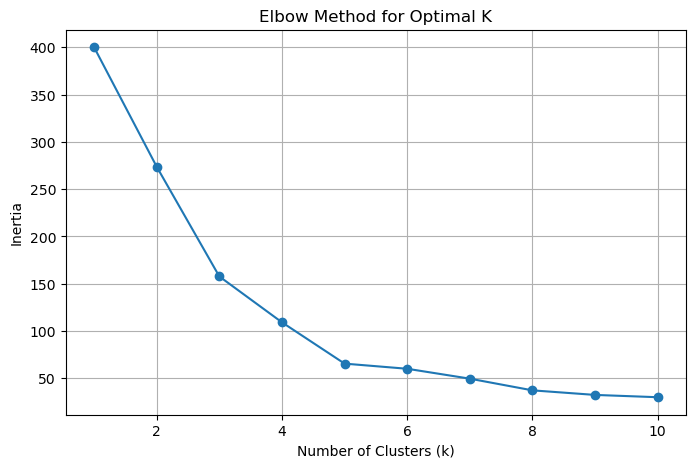

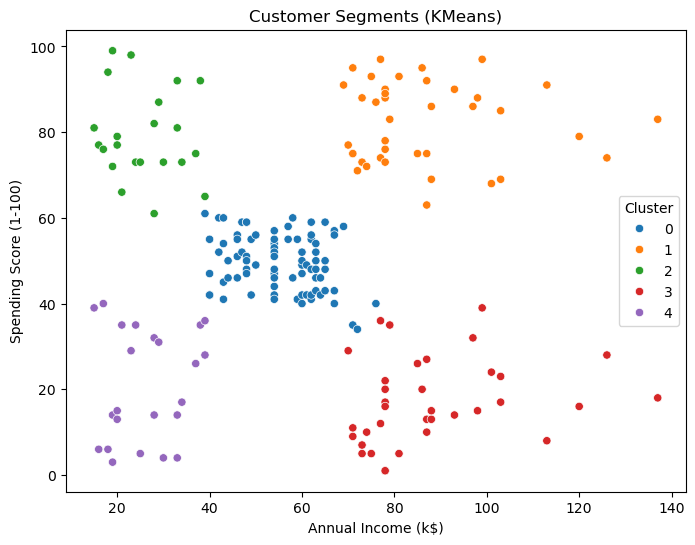

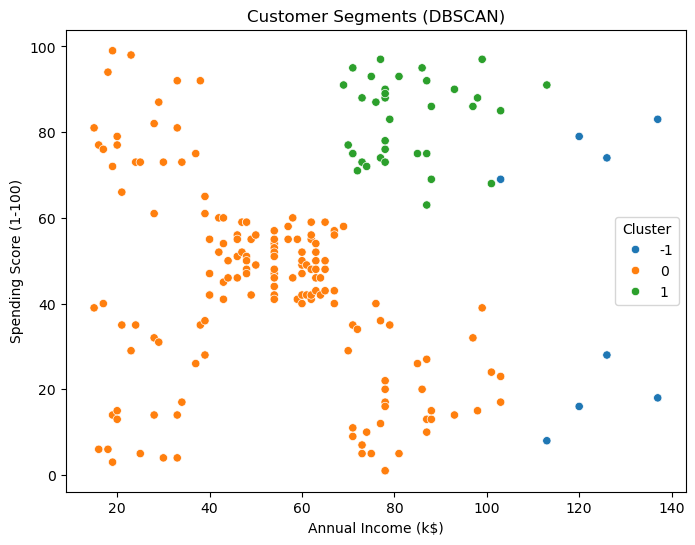

Average Spending Score per KMeans Cluster:
KMeans_Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# 2. Load Dataset
df = pd.read_csv('Mall_Customers.csv')  # Make sure this CSV is in your working directory

# 3. Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 4. Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Elbow Method to Determine Optimal Number of Clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 6. Apply KMeans Clustering (Assuming K=5 from elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualize KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    palette='tab10',
    data=df
)
plt.title('Customer Segments (KMeans)')
plt.legend(title='Cluster')
plt.show()

# 8. Try DBSCAN (Bonus)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# 9. Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='tab10',
    data=df
)
plt.title('Customer Segments (DBSCAN)')
plt.legend(title='Cluster')
plt.show()

# 10. Analyze Average Spending per KMeans Cluster
avg_spending = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per KMeans Cluster:")
print(avg_spending)

# 11. Optional: Save Clustered Data to CSV
df.to_csv('clustered_customers.csv', index=False)

